<a href="https://colab.research.google.com/github/Pravalika-Challuri/PCA/blob/main/PCA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

In [ ]:
from matplotlib import pyplot as plt

In [ ]:
from sklearn.cluster import KMeans

In [ ]:
from sklearn.preprocessing import StandardScaler


In [ ]:
from sklearn.decomposition import PCA

In [ ]:
import scipy.cluster.hierarchy as sch

In [ ]:
from sklearn.cluster import AgglomerativeClustering

In [ ]:
from scipy.cluster.hierarchy import linkage

In [ ]:
import warnings

In [ ]:
warnings.filterwarnings('ignore')

**Data** **collection** **and** **description**

In [ ]:
df = pd.read_csv("wine.csv")

In [ ]:
df1 = df.iloc[:, 1:]

In [ ]:
df1.head()

,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [ ]:
df1.describe()

,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


**Finding** **Coorealation** **between** **the** **variables** **in** **the** **data**

In [ ]:
cor = df1.corr()

In [ ]:
cor.style.background_gradient(cmap='coolwarm')

,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
Alcohol,1.000000,0.094397,0.211545,-0.310235,0.270798,0.289101,0.236815,-0.155929,0.136698,0.546364,-0.071747,0.072343,0.643720
Malic,0.094397,1.000000,0.164045,0.288500,-0.054575,-0.335167,-0.411007,0.292977,-0.220746,0.248985,-0.561296,-0.368710,-0.192011
Ash,0.211545,0.164045,1.000000,0.443367,0.286587,0.128980,0.115077,0.186230,0.009652,0.258887,-0.074667,0.003911,0.223626
Alcalinity,-0.310235,0.288500,0.443367,1.000000,-0.083333,-0.321113,-0.351370,0.361922,-0.197327,0.018732,-0.273955,-0.276769,-0.440597
Magnesium,0.270798,-0.054575,0.286587,-0.083333,1.000000,0.214401,0.195784,-0.256294,0.236441,0.199950,0.055398,0.066004,0.393351
Phenols,0.289101,-0.335167,0.128980,-0.321113,0.214401,1.000000,0.864564,-0.449935,0.612413,-0.055136,0.433681,0.699949,0.498115
Flavanoids,0.236815,-0.411007,0.115077,-0.351370,0.195784,0.864564,1.000000,-0.537900,0.652692,-0.172379,0.543479,0.787194,0.494193
Nonflavanoids,-0.155929,0.292977,0.186230,0.361922,-0.256294,-0.449935,-0.537900,1.000000,-0.365845,0.139057,-0.262640,-0.503270,-0.311385
Proanthocyanins,0.136698,-0.220746,0.009652,-0.197327,0.236441,0.612413,0.652692,-0.365845,1.000000,-0.025250,0.295544,0.519067,0.330417
Color,0.546364,0.248985,0.258887,0.018732,0.199950,-0.055136,-0.172379,0.139057,-0.025250,1.000000,-0.521813,-0.428815,0.316100


**Dimensionality** **reduction** **with** **PCA**

In [ ]:

scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)



In [ ]:
from sklearn.decomposition import PCA

pca = PCA()
pca_components = pca.fit_transform(df_scaled)


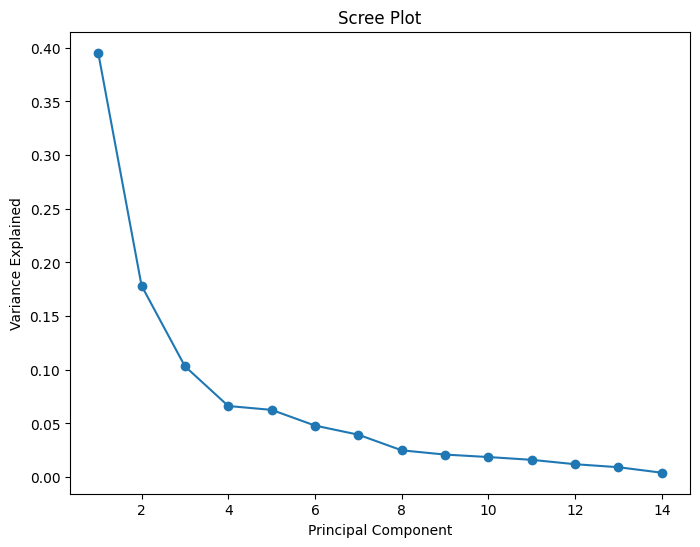

In [ ]:
# Scree plot
plt.figure(figsize=(8, 6))
plt.plot(range(1, len(pca.explained_variance_ratio_) + 1), pca.explained_variance_ratio_, marker='o')
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Variance Explained')
plt.show()





In [ ]:
import numpy as np

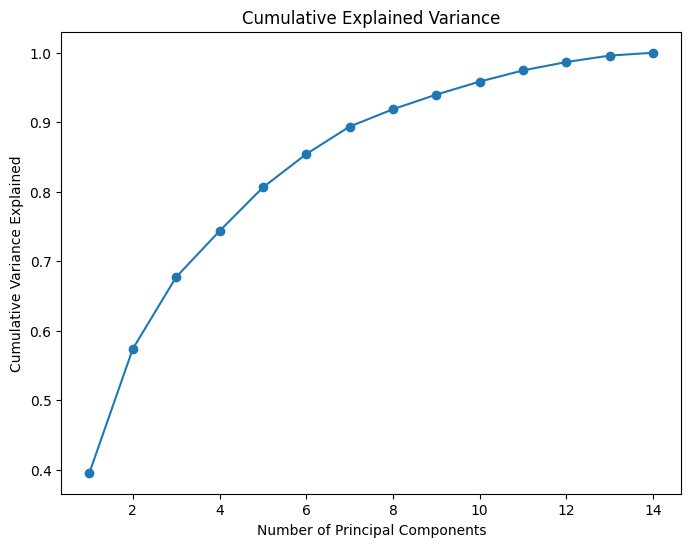

In [ ]:


# Cumulative explained variance
plt.figure(figsize=(8, 6))
plt.plot(range(1, len(pca.explained_variance_ratio_) + 1), np.cumsum(pca.explained_variance_ratio_), marker='o')
plt.title('Cumulative Explained Variance')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Variance Explained')
plt.show()


**Transform** **the** **original** **dataset** **into** **principal** **components**

In [ ]:
# Number of components based on the previous analysis
pca = PCA(n_components=3)  # Example: 3 principal components
pca_transformed = pca.fit_transform(df_scaled)


**Clustering** **with** **the** **original** **data**

In [ ]:
#Apply a clustering algorithm(K-means)
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3)  # Assume 3 clusters
kmeans_labels = kmeans.fit_predict(df_scaled)


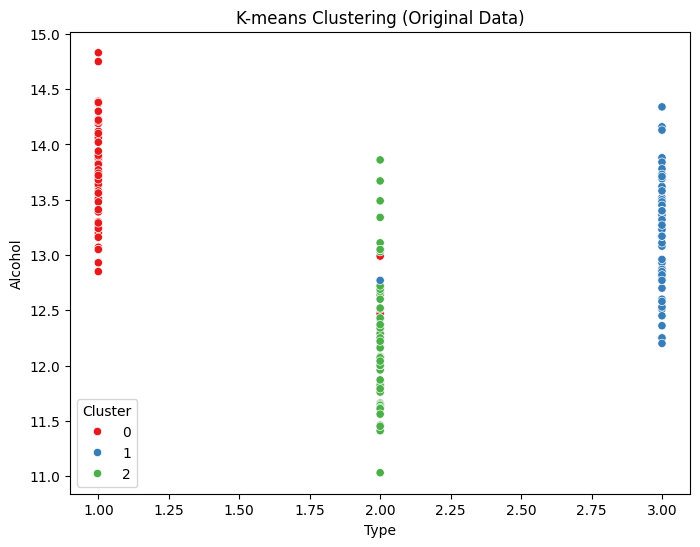

In [ ]:
#Visualise the clustering results
import seaborn as sns
df['Cluster'] = kmeans_labels

plt.figure(figsize=(8, 6))
sns.scatterplot(x=df.iloc[:, 0], y=df.iloc[:, 1], hue='Cluster', data=df, palette='Set1')
plt.title('K-means Clustering (Original Data)')
plt.show()


In [ ]:
#Evaluate the clustering performance
from sklearn.metrics import silhouette_score, davies_bouldin_score

silhouette = silhouette_score(df_scaled, kmeans_labels)
dbi = davies_bouldin_score(df_scaled, kmeans_labels)

print(f"Silhouette Score: {silhouette}")
print(f"Davies-Bouldin Index: {dbi}")


Silhouette Score: 0.30753783238620536
Davies-Bouldin Index: 1.3200605781093537


**Clustering** **the** **PCA** **data**

In [ ]:
#perform K-means clustering on transformed data
kmeans_pca = KMeans(n_clusters=3)
kmeans_labels_pca = kmeans_pca.fit_predict(pca_transformed)


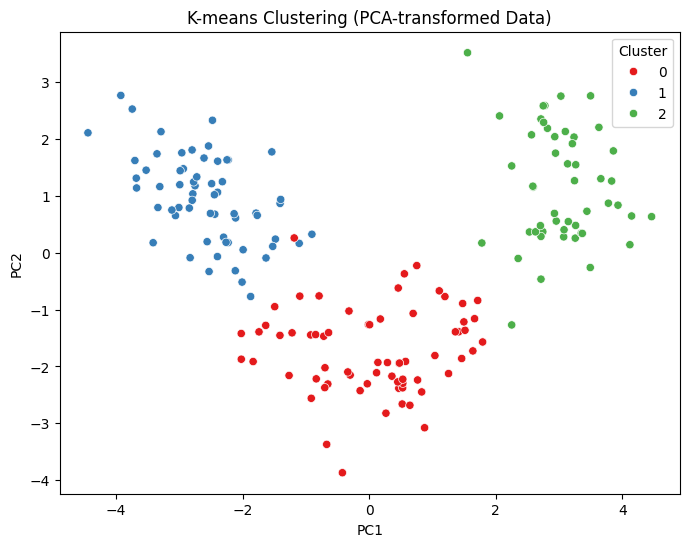

In [ ]:
#Visualise the clustering results on PCA transformed data
pca_df = pd.DataFrame(pca_transformed, columns=[f'PC{i+1}' for i in range(pca_transformed.shape[1])])
pca_df['Cluster'] = kmeans_labels_pca

plt.figure(figsize=(8, 6))
sns.scatterplot(x='PC1', y='PC2', hue='Cluster', data=pca_df, palette='Set1')
plt.title('K-means Clustering (PCA-transformed Data)')
plt.show()


In [ ]:
#Compare the clustering results of PCA transformed data from original data
silhouette_pca = silhouette_score(pca_transformed, kmeans_labels_pca)
dbi_pca = davies_bouldin_score(pca_transformed, kmeans_labels_pca)

print(f"Silhouette Score (PCA Data): {silhouette_pca}")
print(f"Davies-Bouldin Index (PCA Data): {dbi_pca}")


Silhouette Score (PCA Data): 0.4878895418378242
Davies-Bouldin Index (PCA Data): 0.7768202714986706


Task 5: Comparison and Analysis
Compare the Clustering Results from the Original Dataset and PCA-transformed Data:

Step 1:Compare the clustering results obtained from the original dataset and PCA-transformed data.
.Compare the silhouette scores,Davies-Bouldin indices,and the cluster distributions to understand if PCA is influencing and clustering.

Step 2: Discuss similarities or differences.

.You might notice that the PCA-transformed clustering might lead to more clearly defined clusters if the dimensionality reduction helps isolate key patterns

Step 3:Reflect on the impact of dimensionality reduction on clustering performance.
.PCA helps reduce noise and might enhance clustering by focusing on the most variance-explaining features,but it can also lose important information from lower-variance dimensions.

Step 4:Analyze trade-offs between using PCA and clustering directly on the original dataset.
.Direct clustering might capture all the data's complexity,while PCA might give clearer patterns with fewer,but may omit subtle information.

Task 6:Conclusion and insights

Step 1:Summarize keyfindings and insights

PCA often simplifies complex data, making clustering easier and faster but sometimes at the cost of losing critical variance.
Clustering performance can be affected by how much variance is retained after PCA.

Step 2:Discuss practical implications of PCA and clustering in data analysis.

PCA is great for datasets with high dimensionality, improving computational efficiency and sometimes providing more meaningful clusters.

Step 3:Recommendations for when to use each technique

Use PCA when you have a large number of features or need to speed up clustering. However, if retaining every feature is crucial for clustering, direct clustering might be better